<a href="https://colab.research.google.com/github/random-words/colab-notebooks/blob/main/10__time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecatsing + Milestone Project 3

## Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2025-02-22 20:55:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.1s    

2025-02-22 20:55:30 (1.36 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with Pandas


In [2]:
import pandas as pd

df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# len of samples
len(df)

2787

In [5]:
# only closing price feature needed
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


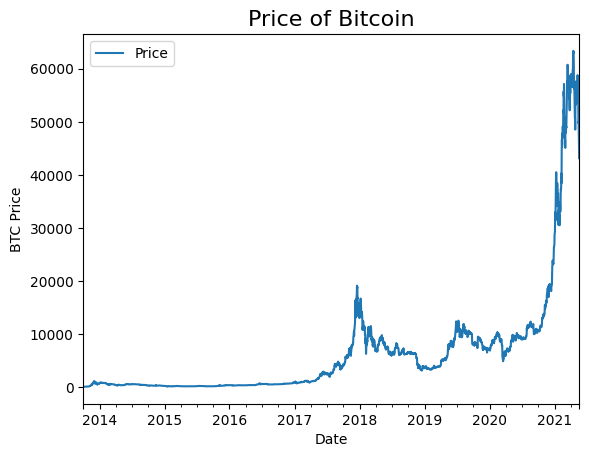

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot()
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin", fontsize=16)
plt.legend()

## Importing time series with Python's CSV

In [7]:
# Importing with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line wich is titles
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get dates
    btc_price.append(float(line[2])) # get closing price

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

<ipython-input-8-e93ad1f3881c>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


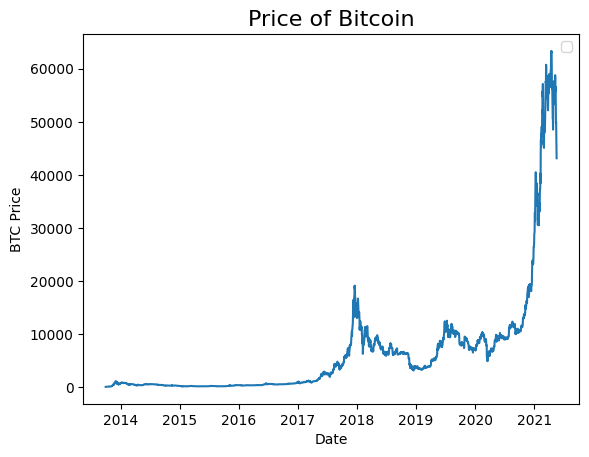

In [8]:
# Plot from CSV
import numpy as np
plt.figure()
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.title("Price of Bitcoin", fontsize=16)
plt.legend()

## Format data part 1: Create train/test sets

### Train & test sets (wrong way)

In [9]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, prices, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

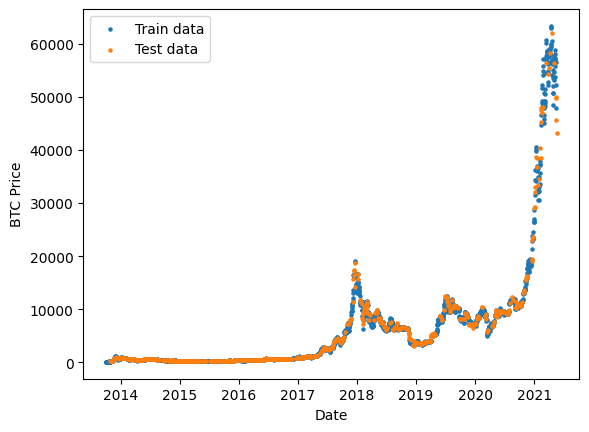

In [11]:
# Let's plot wrong splits
plt.figure()
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend()

### Train & test sets (right way)

In [12]:
prices[:10]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  , 123.033  , 124.049  , 125.96116])

In [13]:
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

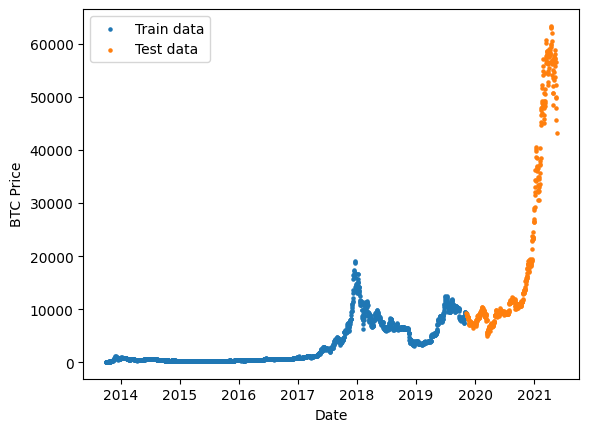

In [14]:
# Plot correctly splitted data
plt.figure()
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend()

## Create a plotting function

In [15]:
timesteps

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', ...,
       '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
       '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]')

In [16]:
prices

array([  123.65499   ,   125.455     ,   108.58483   , ...,
       47885.62525472, 45604.61575361, 43144.47129086])

In [17]:
X_train

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', ...,
       '2019-11-05T00:00:00.000000000', '2019-11-06T00:00:00.000000000',
       '2019-11-07T00:00:00.000000000'], dtype='datetime64[ns]')

In [18]:
y_train

array([ 123.65499   ,  125.455     ,  108.58483   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

In [19]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

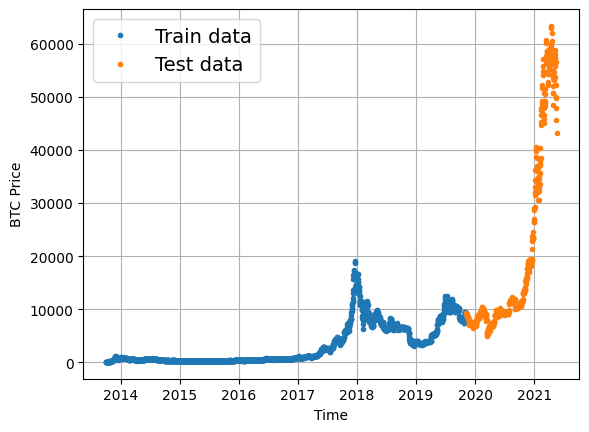

In [20]:
# Test the function
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling experiments

## Model 0: Naive forecast (baseline)

In [21]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [22]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

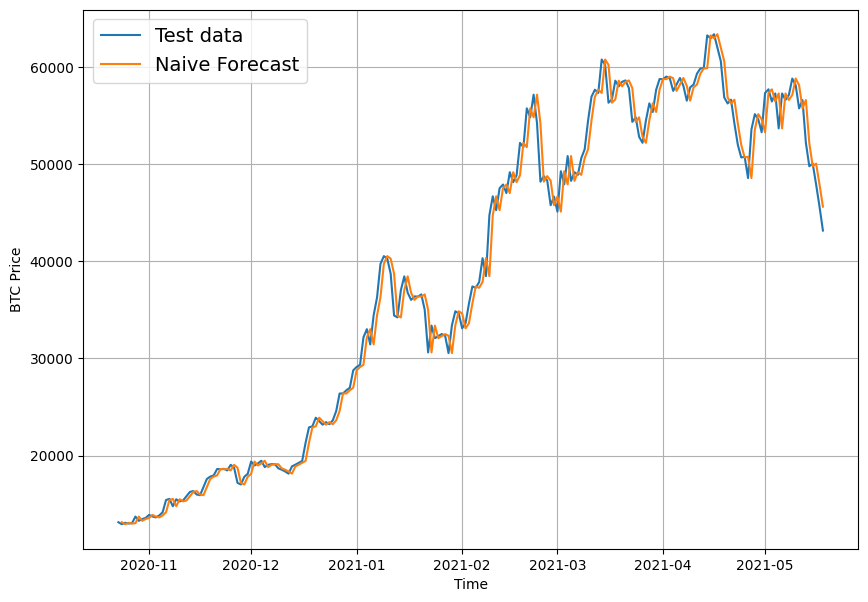

In [23]:
# Plot naive forecast
# plot_time_series(X_train, y_train, label="Train data")
plt.figure(figsize=(10, 7))
plot_time_series(X_test, y_test, label="Test data", start=350, format="-")
plot_time_series(X_test[1:], naive_forecast, format="-", label="Naive Forecast",
                 start=350)

## Evaluating a time series model

In [24]:
import tensorflow as tf

In [25]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # MAE of naive forecast
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # seasonality of 1 day (hence shift of 1)

  return mae / mae_naive_no_season

In [26]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9995699939182624

In [27]:
# Create a function to return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # cast to float32 because tensorflow uses it
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate metrics
  mae = tf.keras.metrics.mae(y_true, y_pred)
  mse = tf.keras.metrics.mse(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mape(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [28]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [29]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

In [30]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Format Data Part 2: Windowing our dataset

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [32]:
print(f"From this: {btc_price[:7]} => to that: {btc_price[7]}")

From this: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] => to that: 123.033


In [33]:
# Setup global variables
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use past week of data to make a prediction

In [34]:
# Create a function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  return x[:, :-horizon], x[:, -horizon:]

In [35]:
tf.expand_dims(tf.range(8), axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [36]:
# Test function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [37]:
# Create a function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  # Create as window
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # Create a 2D array of window_steps (-1 for 0-indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create as 2D array of windows of window_size size
  # print(window_indexes, window_indexes.shape)

  # Index the target array with 2D array of widow steps
  windowed_array = x[window_indexes]
  # print(windowed_array.shape)

  # Get labelled windows
  windows, labels = get_labelled_windows(windowed_array)
  return windows, labels

In [38]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [39]:
len(prices)

2787

In [40]:
# First 3
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [41]:
# Last 3
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [42]:
prices[-1:]

array([43144.47129086])

## Turning windows into train & test datasets

In [43]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [44]:
# Make train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1 - test_split)) # default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [45]:
# Create train/test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [46]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [47]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [48]:
# if train array's the same as before
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback

In [49]:
import os

# Create a function to create a ModelCheckpoint callback with a filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  full_path = save_path + "/" + model_name + ".keras"
  return tf.keras.callbacks.ModelCheckpoint(filepath=full_path,
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense Model (window = 7, horizon = 1)

In [50]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# Construct Model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 2640.5505 - mae: 2640.5505 - mse: 18187104.0000 - val_loss: 1118.7294 - val_mae: 1118.7294 - val_mse: 3722217.7500
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 354.5305 - mae: 354.5305 - mse: 486694.4688 - val_loss: 1624.6621 - val_mae: 1624.6621 - val_mse: 6386761.5000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 239.8067 - mae: 239.8067 - mse: 250240.5938 - val_loss: 1008.7482 - val_mae: 1008.7482 - val_mse: 3295859.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 175.4812 - mae: 175.4812 - mse: 161379.4375 - val_loss: 1048.7046 - val_mae: 1048.7046 - val_mse: 3334729.2500
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 170.8324 - mae: 170.8324 - mse: 154512.2031 - val_loss: 999.8961 - val_mae: 999.8961 - val_mse: 3137228.7500
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 166.9349 - mae: 166.9349 - mse: 146570.7969 - val_loss: 958.8540 - val_mae: 958.8539 - 

In [51]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [52]:
# Evaluate on test data
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 288.1927 - mae: 288.1927 - mse: 352045.5312


[576.7471923828125, 576.7471923828125, 1178157.75]

In [53]:
# Load in saved best performing model_1 and evaluate
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense.keras")
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 286.7424 - mae: 286.7424 - mse: 349896.7812 


[573.0655517578125, 573.0655517578125, 1178616.75]

## Making forecast

In [54]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # 1D array of preds

In [55]:
# Make preds
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8855.637, 8759.649, 9011.765, 8739.962, 8702.567, 8743.626,
        8676.456, 8478.163, 8459.362, 8508.523], dtype=float32)>)

In [56]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([556]), TensorShape([556]))

In [57]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 573.06555,
 'mse': 1178616.6,
 'rmse': 1085.6411,
 'mape': 2.5760217,
 'mase': 1.0067174}

In [58]:
test_labels.shape

(556, 1)

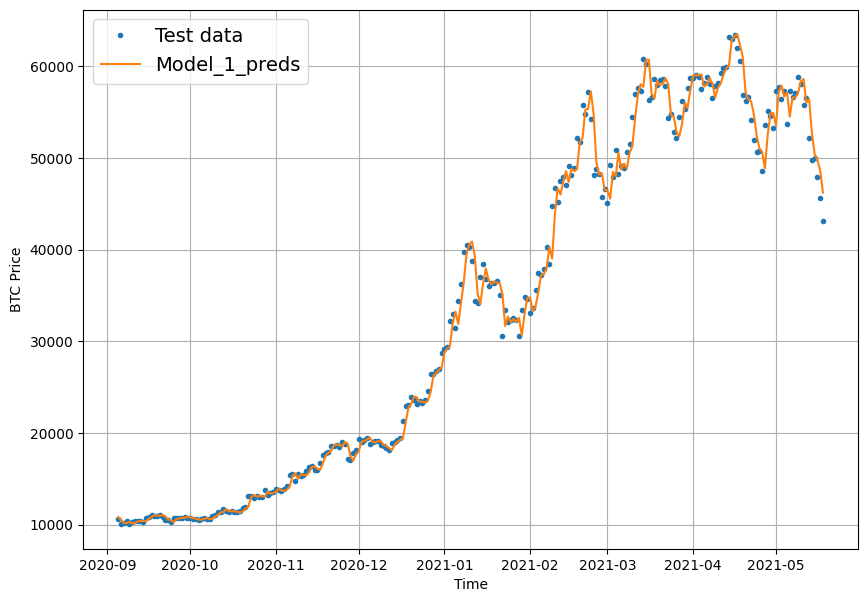

In [59]:
# Plot preds
offset=300
plt.figure(figsize=(10, 7))
# Ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0],
                 start=offset, label="Test data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds, format="-",
                 start=offset, label="Model_1_preds")

## Model 2: Dense Model (window = 30, horizon = 1)

In [60]:
HORIZON = 1
WINDOW_SIZE = 30

In [61]:
# Make appropriate sizes for data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE,
                                         horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [62]:
# Make train test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [63]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows,
                             test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [64]:
# Evaluate on test data
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 322.5723 - mae: 322.5723 - mse: 418668.0312


[638.8407592773438, 638.8407592773438, 1381269.25]

In [65]:
# Load pest performing model
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense.keras")
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 313.4298 - mae: 313.4298 - mse: 400375.5625 


[619.130126953125, 619.130126953125, 1355710.5]

In [66]:
# Get forecast preds
model_2_preds = make_preds(model_2,
                           test_windows)
model_2_preds[:3]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


<tf.Tensor: shape=(3,), dtype=float32, numpy=array([8916.334, 8945.033, 8803.039], dtype=float32)>

In [67]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 619.1301,
 'mse': 1355710.4,
 'rmse': 1164.3497,
 'mape': 2.7774045,
 'mase': 1.0822455}

In [68]:
model_1_results

{'mae': 573.06555,
 'mse': 1178616.6,
 'rmse': 1085.6411,
 'mape': 2.5760217,
 'mase': 1.0067174}

In [69]:
X_test[:10]

array(['2019-11-08T00:00:00.000000000', '2019-11-09T00:00:00.000000000',
       '2019-11-10T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
       '2019-11-12T00:00:00.000000000', '2019-11-13T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-11-15T00:00:00.000000000',
       '2019-11-16T00:00:00.000000000', '2019-11-17T00:00:00.000000000'],
      dtype='datetime64[ns]')

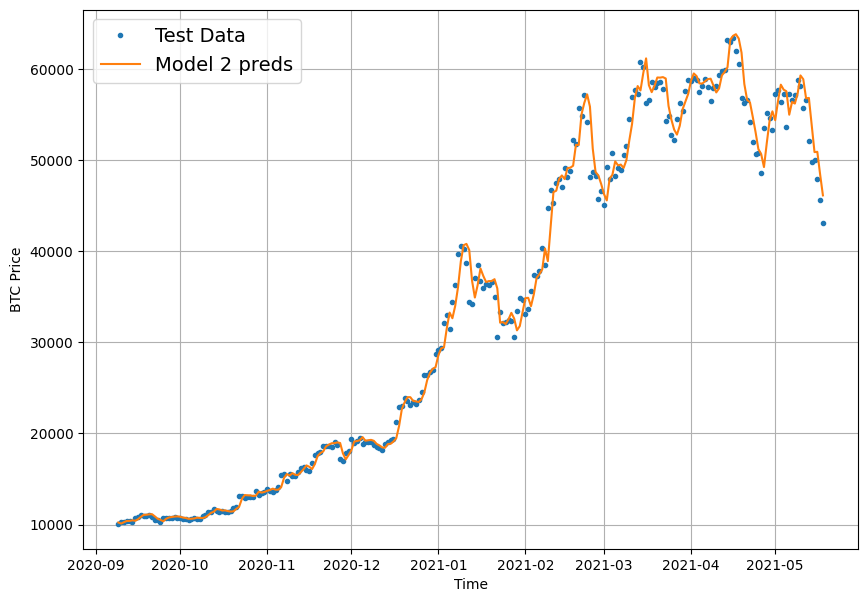

In [70]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0],
                 start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds,
                 start=offset, label="Model 2 preds", format="-")

## Model 3: Dense (window=30, horizon=7)

In [71]:
HORIZON = 7
WINDOW_SIZE = 30

In [72]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE,
                                         horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [73]:
# Create train/test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [74]:
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows,
                             test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1523.3438 - val_loss: 2967.4077
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 519.0441 - val_loss: 2086.4778
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 393.0011 - val_loss: 1829.8556
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 315.0072 - val_loss: 1461.5344
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 276.2043 - val_loss: 1346.3271
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 248.2992 - val_loss: 1226.2743
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 234.3541 - val_loss: 1212.4390
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 229.6254 - val_loss: 1146.5259
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 219.3404 - val_loss: 1146.1698
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 216.1420 - val_loss: 1092.2590
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 206.9831 - val_loss: 1103.8845

In [75]:
# Evaluate
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 326.4215 


637.217529296875

In [76]:
# Load best model
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense.keras")
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 321.2451  


627.5799560546875

In [77]:
# Make preds
model_3_preds = make_preds(model_3,
                           test_windows)
model_3_preds[:3]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[8805.358 , 8541.286 , 8778.09  , 8690.348 , 8926.665 , 8910.285 ,
        8741.955 ],
       [8743.468 , 8511.428 , 8545.2   , 8613.142 , 8725.971 , 8624.828 ,
        8568.967 ],
       [8651.722 , 8276.157 , 8475.139 , 8438.799 , 8426.874 , 8479.093 ,
        8364.2295]], dtype=float32)>

In [78]:
model_3_preds.shape

TensorShape([551, 7])

In [79]:
# Evaluate model_3 results
model_3_results = evaluate_preds(y_true=test_labels,
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 146.65164 ,  118.356865,   81.307755,  132.01088 ,  166.41908 ,
          66.47042 ,   87.56759 ,  544.675   ,  519.50977 ,  105.38714 ,
         190.71812 ,  136.38908 ,  115.96498 ,  420.68387 ,   86.32122 ,
         317.99332 ,   90.52853 ,  209.87646 ,  124.75028 ,   71.14342 ,
          91.308525,  202.62473 ,  163.73842 ,   85.8028  ,   63.47984 ,
         229.12459 ,  111.41664 ,   60.489956,   61.144184,   87.59103 ,
          95.88637 ,   80.53376 ,  242.41867 ,  387.06152 ,  675.9215  ,
          44.071568,   54.996235,   93.67822 ,   97.36161 ,   95.17243 ,
          16.861607,  126.16148 ,   66.135605,   72.554825,  110.652275,
          54.06536 ,  148.8323  ,  125.509766,   84.40632 ,  156.3007  ,
         216.29904 ,  157.6211  ,   81.88944 ,  259.46652 ,  417.1873  ,
         108.62577 ,  328.39682 ,  172.5992  ,   68.35072 ,   66.925156,
          78.214355,  509.2899  ,  222.33064 ,  116.39983 ,   51.18276 ,
          79.447685,  395.83176 ,   97.48981

## Make evaluation function works for larger horizons

In [80]:
model_3_results["mae"].ndim

1

In [81]:
model_2_results["mae"].ndim

0

In [82]:
tf.reduce_mean(model_3_results["mae"]).numpy()

627.5799

In [83]:
# Create a function to return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # cast to float32 because tensorflow uses it
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate metrics
  mae = tf.keras.metrics.mae(y_true, y_pred)
  mse = tf.keras.metrics.mse(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mape(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for higher metrics (for longer horizons)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [84]:
# Get aggregated results from model_3
model_3_results = evaluate_preds(y_true=test_labels,
                                 y_pred=model_3_preds)
model_3_results

{'mae': 627.5799,
 'mse': 1340148.4,
 'rmse': 661.73206,
 'mape': 2.877968,
 'mase': 1.0953465}

In [85]:
model_3_preds[:3]

<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[8805.358 , 8541.286 , 8778.09  , 8690.348 , 8926.665 , 8910.285 ,
        8741.955 ],
       [8743.468 , 8511.428 , 8545.2   , 8613.142 , 8725.971 , 8624.828 ,
        8568.967 ],
       [8651.722 , 8276.157 , 8475.139 , 8438.799 , 8426.874 , 8479.093 ,
        8364.2295]], dtype=float32)>

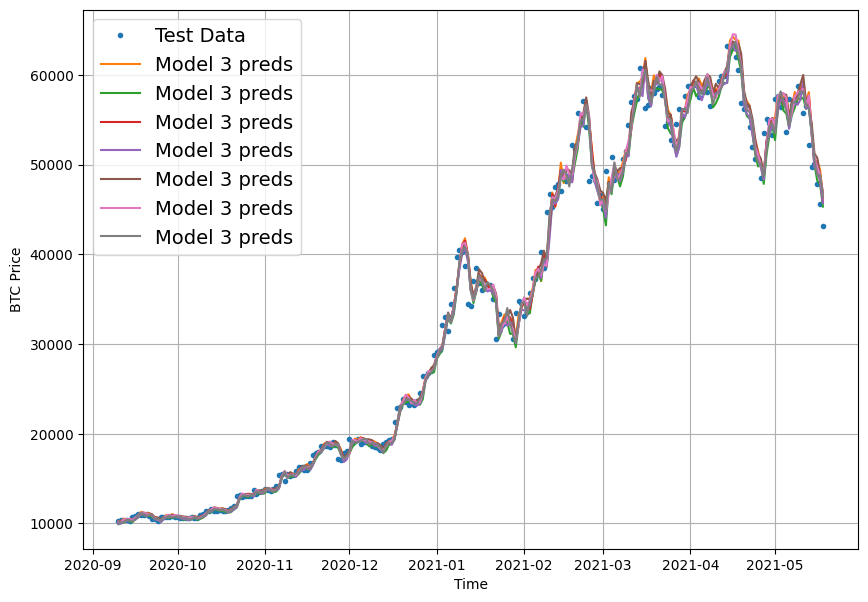

In [86]:
# Plot results
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0],
                 start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds,
                 start=offset, label="Model 3 preds", format="-")

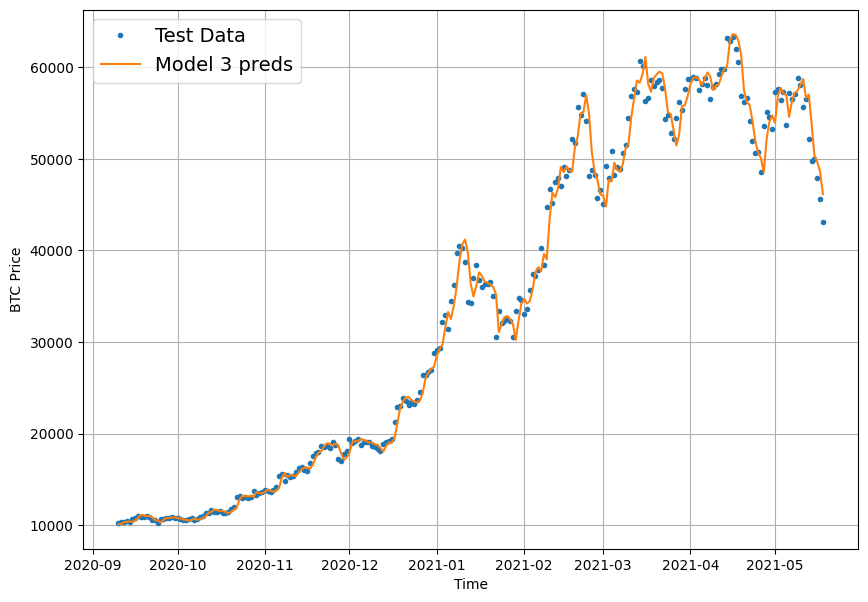

In [87]:
# Plot results
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0],
                 start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1),
                 start=offset, label="Model 3 preds", format="-")

## Creating DataFrame from all of models results

In [88]:
import pandas as pd

In [89]:
naive_results, model_1_results, model_2_results, model_3_results

({'mae': 567.9802,
  'mse': 1147547.0,
  'rmse': 1071.2362,
  'mape': 2.5165248,
  'mase': 0.99957},
 {'mae': 573.06555,
  'mse': 1178616.6,
  'rmse': 1085.6411,
  'mape': 2.5760217,
  'mase': 1.0067174},
 {'mae': 619.1301,
  'mse': 1355710.4,
  'rmse': 1164.3497,
  'mape': 2.7774045,
  'mase': 1.0822455},
 {'mae': 627.5799,
  'mse': 1340148.4,
  'rmse': 661.73206,
  'mape': 2.877968,
  'mase': 1.0953465})

<Axes: >

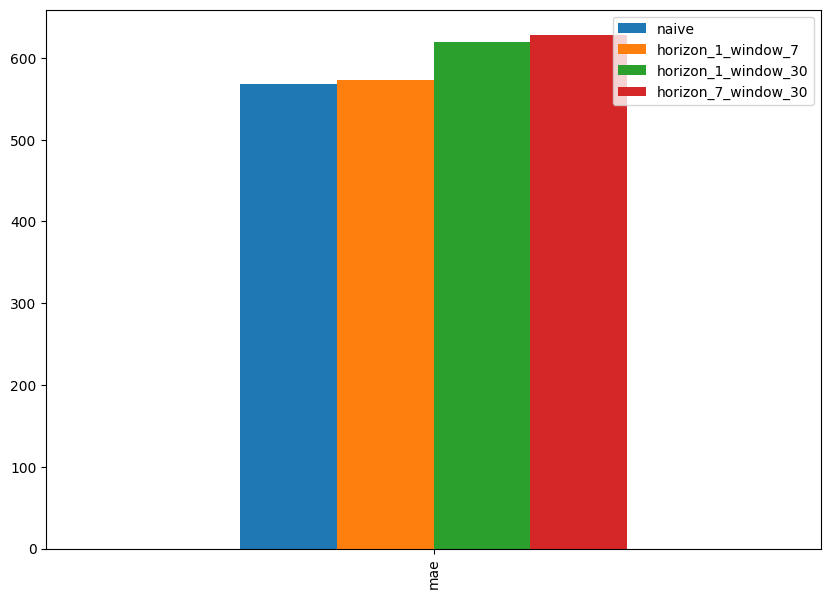

In [90]:
df = pd.DataFrame({"naive":naive_results["mae"],
                   "horizon_1_window_7":model_1_results["mae"],
                   "horizon_1_window_30":model_2_results["mae"],
                   "horizon_7_window_30":model_3_results["mae"]},
                  index=["mae"])
df.plot(figsize=(10, 7), kind="bar")

## Model 4: Conv1D

In [91]:
HORIZON = 1
WINDOW_SIZE = 7

In [92]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [93]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [94]:
# Check data input shape
train_windows[0].shape

(7,)

In [95]:
train_windows[0]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])

In [96]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [97]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [98]:
# Test lambda layer
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [99]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1,
                  padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1d")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_4.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3272.4124 - val_loss: 8087.0728
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 776.1863 - val_loss: 1915.6715
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 246.9859 - val_loss: 1045.8384
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 181.7400 - val_loss: 1106.6718
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 175.9992 - val_loss: 1059.2406
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 172.9355 - val_loss: 1023.3448
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 170.3639 - val_loss: 1010.0670
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 168.6787 - val_loss: 994.9205
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 167.0287 - val_loss: 985.3821
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 165.4314 - val_loss: 972.2325
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 163.6996 - val_loss: 968.3379
Epoch 12/1

In [100]:
model_4.summary()

Model: "model_4_conv1d"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 128)              │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [101]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 285.4420 


570.7817993164062

In [102]:
# Need to remove restrictions
tf.keras.config.enable_unsafe_deserialization()

In [103]:
# Need to add custom function to Lambda Layer
# provide custom object mapping
custom_objects = {"<lambda>": lambda x: tf.expand_dims(x, axis=1)}

In [104]:
# # Doesn't work because of tf not defined in Lambda function inside Lambda Layer

# # Load best
# model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1d.keras",
#                                      custom_objects={"<lambda>":expand_dims_custom})
# model_4.evaluate(test_windows, test_labels)

In [105]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8899.028, 8795.518, 9015.964, 8787.398, 8738.102, 8756.892,
       8687.69 , 8533.945, 8473.808, 8526.097], dtype=float32)>

In [106]:
# Evaluate preds
model_4_results = evaluate_preds(tf.squeeze(test_labels), model_4_preds)
model_4_results

{'mae': 570.7818,
 'mse': 1184827.6,
 'rmse': 1088.4979,
 'mape': 2.550105,
 'mase': 1.0027056}

## Model 5: RNN (LSTM)

In [107]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.LSTM(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_5.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 3045.0220 - val_loss: 13206.2676
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1782.0454 - val_loss: 4533.6895
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 446.2032 - val_loss: 1480.6392
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 220.8445 - val_loss: 1133.9325
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 187.3763 - val_loss: 1122.9590
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 184.0403 - val_loss: 1070.3019
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 180.5311 - val_loss: 1066.3268
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 179.4983 - val_loss: 1075.6704
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 179.0954 - val_loss: 1076.4130
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 178.2771 - val_loss: 1068.7247
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 177.0135 - val_loss: 1063.93

In [108]:
# Evaluate
model_5.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 311.7490


626.7240600585938

In [109]:
# Make preds
model_5_preds = make_preds(model_5,
                           test_windows)
model_5_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8888.188, 8739.155, 8866.438, 8731.068, 8690.474, 8667.273,
       8610.348, 8496.673, 8401.559, 8432.028], dtype=float32)>

In [110]:
# Make Results
model_5_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_5_preds)
model_5_results

{'mae': 626.72406,
 'mse': 1326498.9,
 'rmse': 1151.7373,
 'mape': 2.8155692,
 'mase': 1.1009806}

### Model 5 but with Functional API

In [111]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE, ))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs, outputs, name="model_5_lstm_functional")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            validation_data=(test_windows,
                             test_labels),
            callbacks=[create_model_checkpoint(model_5.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2850.3088 - val_loss: 10193.0264
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1234.4299 - val_loss: 1071.1895
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 252.8892 - val_loss: 1183.8540
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 200.6248 - val_loss: 1041.8630
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 182.7634 - val_loss: 1051.4457
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 178.0233 - val_loss: 1056.7805
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 177.1841 - val_loss: 1050.4141
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 176.0958 - val_loss: 1046.6266
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 175.0934 - val_loss: 1049.1228
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 174.1555 - val_loss: 1038.2041
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 169.3879 - val_loss: 1012.7828


In [112]:
# Cannot use it because of tf and Lambda layer again

# # Load best model and evaluate
# model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_lstm_functional.keras")
# model_5.evaluate(test_windows, test_labels)

In [113]:
model_5.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 291.3009 


585.3685302734375

In [114]:
# Make preds
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8905.588, 8801.151, 8957.254, 8737.775, 8755.628, 8743.194,
       8647.606, 8534.155, 8464.118, 8493.452], dtype=float32)>

In [115]:
# Make results
model_5_results = evaluate_preds(test_labels,
                                 model_5_preds)
model_5_results

{'mae': 585.36847,
 'mse': 1219124.8,
 'rmse': 585.36847,
 'mape': 2.6117702,
 'mase': 30.08254}

## Make a multivariate time series dataset

In [116]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [117]:
# Add bitcoin halving events to dataset
block_reward_1 = 50 # doesn't influence, because our data starts from 2013
block_reward_2 = 25 # from 2012
block_reward_3 = 12.5 # from 2016
block_reward_4 = 6.25 # from 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [118]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [119]:
# Create date ranges where specifir datetime must be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [120]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add values as features
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [121]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [122]:
bitcoin_prices_block.iloc[1500:1550].head()

,Price,block_reward
Date,,
2017-11-09,7342.82375,12.5
2017-11-10,7250.77000,12.5
2017-11-11,6773.69500,12.5
2017-11-12,6075.30125,12.5
2017-11-13,5969.13000,12.5


In [123]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

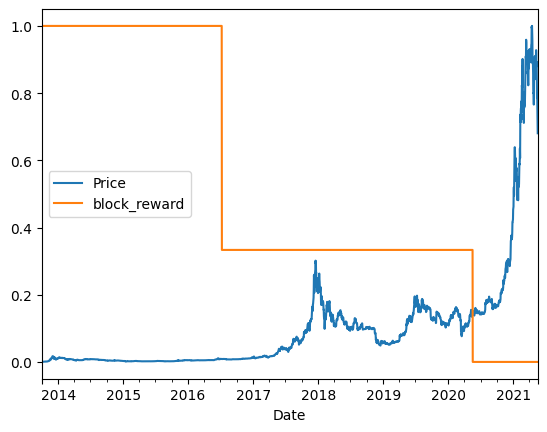

In [124]:
# Plot scaled features
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot()

## Making a windowed dataset for 2 features

In [125]:
# Setup datasset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [126]:
# Make a copy of df
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [127]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [128]:
len(X), len(y)

(2780, 2780)

In [129]:
y.head()

,Price
Date,
2013-10-08,123.032997
2013-10-09,124.049004
2013-10-10,125.961159
2013-10-11,125.279663
2013-10-12,125.927498


In [130]:
# Make train and test sets with indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

In [131]:
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: same as model_1 but with multivariate data

In [132]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_6.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2664.7476 - val_loss: 1632.5149
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 402.9831 - val_loss: 2013.2396
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 239.8646 - val_loss: 1203.0082
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 176.2417 - val_loss: 983.8812
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 161.5674 - val_loss: 900.4575
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 153.8704 - val_loss: 884.5997
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 149.8546 - val_loss: 859.2780
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 145.6640 - val_loss: 829.0179
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 141.7678 - val_loss: 794.2991
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 137.8746 - val_loss: 767.9305
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 134.7619 - val_loss: 749.7401
Epoch 12/100


In [133]:
# Evaluate model
model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 282.6874 


568.3545532226562

In [134]:
# Load in and evaluate
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense_multivariate.keras")
model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 282.4749  


566.9445190429688

In [135]:
# Make preds with loaded model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8830.849, 8767.406, 9034.594, 8765.065, 8709.908, 8728.259,
       8671.331, 8504.065, 8441.138, 8522.249], dtype=float32)>

In [136]:
# Get eval metrics
model_6_results = evaluate_preds(y_test,
                                 model_6_preds)
model_6_results

{'mae': 566.9446,
 'mse': 1159291.8,
 'rmse': 1076.7041,
 'mape': 2.5368295,
 'mase': 0.9959646}

In [137]:
model_1_results

{'mae': 573.06555,
 'mse': 1178616.6,
 'rmse': 1085.6411,
 'mape': 2.5760217,
 'mase': 1.0067174}

## Model 7: N-BEATS algorithm

### Building and testing N-BEATS block layer

In [138]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # kwargs takes care of traverse arguments that relates to parent class (trainable, name, input_shape)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains 4 Dense layers with ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output is theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [139]:
# Set dummy NBeatsBlock layer
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [140]:
# Create dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [141]:
# Pass inputs to layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.35554853  0.01557019  0.2143583  -0.76159054  0.15099517 -0.0994688
  0.03991796]
Forecast: 0.5370789170265198


### Preparing data for N-BEATS algorithm using tf.data

In [142]:
HORIZON = 1
WINDOW_SIZE = 7

In [143]:
# Create N-BEATS data inputs
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [144]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head(5)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [145]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets with indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train)

(2224, 2224)

In [146]:
# Use tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine features and labels by zipping them together
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters

In [147]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

### Get ready for residual connections

In [148]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

added, subtracted

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>)

### Building, compiling and fitting N-BEATS algorighm

In [149]:
INPUT_SIZE

7

In [150]:
%%time

tf.random.set_seed(42)

# Setup an instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE, ), name="stack_input")

# Create initial backcast and forecast input (backwards preds + horizon preds)
residuals, forecast = nbeats_block_layer(stack_input)

# Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # 29 because first stack created in previous step
  # Use NBeatsBlock to calculate the backcast and forecast
  backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                         theta_size=THETA_SIZE,
                                         horizon=HORIZON,
                                         n_neurons=N_NEURONS,
                                         n_layers=N_LAYERS,
                                         name=f"NBeatsBlock_{i}"
                                         )(residuals)

  # Create double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# Put stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_NBEATS")

# Compile model
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# # Fit model with some callbacks
# model_7.fit(train_dataset,
#             epochs=N_EPOCHS,
#             validation_data=test_dataset,
#             callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
#                                                         patience=200,
#                                                         restore_best_weights=True),
#                        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
#                                                             patience=100,
#                                                             verbose=1)])

CPU times: user 3.44 s, sys: 214 ms, total: 3.66 s
Wall time: 3.45 s


In [151]:
# Evaluate N-BEATS model
model_7.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 20145.3438


20145.34375

In [152]:
# Make preds
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-17.857075, -11.081112, -19.50552 , -33.513065, -31.264194,
       -25.033756, -20.299778, -24.96346 , -24.937172, -20.54364 ],
      dtype=float32)>

In [153]:
# Evaluate preds
model_7_results = evaluate_preds(y_test, model_7_preds)
model_7_results

{'mae': 20145.344,
 'mse': 714489500.0,
 'rmse': 26729.936,
 'mape': 100.250534,
 'mase': 35.38979}

In [154]:
model_1_results

{'mae': 573.06555,
 'mse': 1178616.6,
 'rmse': 1085.6411,
 'mape': 2.5760217,
 'mase': 1.0067174}

In [155]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

### Plotting N-BEATS architecture

In [156]:
# Plot N-BEATS model
from tensorflow.keras.utils import plot_model

plot_model(
    model_7,
    to_file="model_7.pdf",  # or .pdf
    show_shapes=True,
    rankdir="TB",           # top-to-bottom, can also try "LR"
)

## Model 8: Creating an ensemble

In [157]:
HORIZON, WINDOW_SIZE

(1, 7)

## Constructing and fitting an ensemble of models (using different loss functions)

In [158]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):

  # make empty list of trained ensemble models
  ensemble_models = []

  # create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing {loss_function} for {num_epochs} epochs, model number - {i}")

      # Construct a simple model
      model = tf.keras.Sequential([
          # Initialize layers with normal distribution for estimating prediction intervals
          layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
          layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
          layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model
      ensemble_models.append(model)

  return ensemble_models

In [159]:
%%time
# Get list of trained models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing mae for 1000 epochs, model number - 0

Epoch 465: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 724: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 824: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing mse for 1000 epochs, model number - 0

Epoch 326: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 426: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing mape for 1000 epochs, model number - 0

Epoch 222: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 333: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 433: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing mae for 1000 epochs, model number - 1

Epoch 840: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 940:

In [160]:
len(ensemble_models)

15

In [161]:
ensemble_models

[<Sequential name=sequential, built=True>,
 <Sequential name=sequential_1, built=True>,
 <Sequential name=sequential_2, built=True>,
 <Sequential name=sequential_3, built=True>,
 <Sequential name=sequential_4, built=True>,
 <Sequential name=sequential_5, built=True>,
 <Sequential name=sequential_6, built=True>,
 <Sequential name=sequential_7, built=True>,
 <Sequential name=sequential_8, built=True>,
 <Sequential name=sequential_9, built=True>,
 <Sequential name=sequential_10, built=True>,
 <Sequential name=sequential_11, built=True>,
 <Sequential name=sequential_12, built=True>,
 <Sequential name=sequential_13, built=True>,
 <Sequential name=sequential_14, built=True>]

### Make preds with ensemble model

In [162]:
# Create a function wich uses a list of trained models to make and return a list of preds
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [163]:
# Create a list of ensemble preds
%%time

ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
CPU times: user 849 ms, sys: 19.1 ms, total: 868 ms
Wall time: 1.27 s


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8807.011,  8787.896,  9013.135, ..., 49939.32 , 48302.703,
        46612.133],
       [ 8750.174,  8755.14 ,  9046.988, ..., 49131.57 , 48040.465,
        46599.74 ],
       [ 8781.24 ,  8812.465,  9053.389, ..., 49860.01 , 48211.76 ,
        46084.254],
       ...,
       [ 8782.043,  8735.257,  9062.61 , ..., 50299.242, 48726.938,
        46063.754],
       [ 8767.131,  8723.667,  8991.099, ..., 50299.82 , 48901.734,
        46459.97 ],
       [ 8812.467,  8790.678,  9094.3  , ..., 50278.89 , 48220.938,
        45939.656]], dtype=float32)>

In [164]:
len(y_test)

556

In [165]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8785.644 , 8777.077 , 9054.425 , 8722.248 , 8738.252 , 8731.2295,
       8653.47  , 8489.956 , 8450.082 , 8523.089 ], dtype=float32)>

In [166]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8781.919, 8777.626, 9053.389, 8725.568, 8738.262, 8730.653,
       8654.098, 8495.193, 8448.808, 8528.801], dtype=float32)

In [167]:
# Evaluate ensemble model predicions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_preds)
ensemble_results

{'mae': 580.2205,
 'mse': 1179350.2,
 'rmse': 1085.9191,
 'mape': 2.6280005,
 'mase': 1.0192868}

In [168]:
# Evaluate ensemble model predicions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 570.9422,
 'mse': 1153897.1,
 'rmse': 1074.196,
 'mape': 2.5771964,
 'mase': 1.0029873}

In [169]:
# Evaluate ensemble model predicions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 567.6622,
 'mse': 1142251.1,
 'rmse': 1068.7615,
 'mape': 2.5632536,
 'mase': 0.9972252}

In [170]:
model_1_results

{'mae': 573.06555,
 'mse': 1178616.6,
 'rmse': 1085.6411,
 'mape': 2.5760217,
 'mase': 1.0067174}

### Plotting the prediciton intervals (uncertainty estimates) of our ensemble

In [171]:
tf.math.reduce_std(ensemble_preds, axis=0)[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([24.01477  , 31.316904 , 34.06303  , 42.396614 , 38.2982   ,
       48.799824 , 20.678713 , 37.246162 , 32.145214 , 15.3147745],
      dtype=float32)>

In [172]:
# Find upper and lower bounds of predictions
def get_upper_lower(preds):
  # Measure std of preds
  std = tf.math.reduce_std(preds, axis=0)

  # Multiply std by 1.96 because of formula and Gaussian Distribution
  interval = 1.96 * std

  # Get preds upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [173]:
# Get upper and lower bounds from 95% preds interval
lower, upper = get_upper_lower(preds=ensemble_preds)
lower[:10], upper[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8738.574 , 8715.696 , 8987.661 , 8639.15  , 8663.1875, 8635.582 ,
        8612.939 , 8416.953 , 8387.077 , 8493.072 ], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8832.713, 8838.458, 9121.188, 8805.346, 8813.316, 8826.877,
        8694.   , 8562.959, 8513.087, 8553.105], dtype=float32)>)

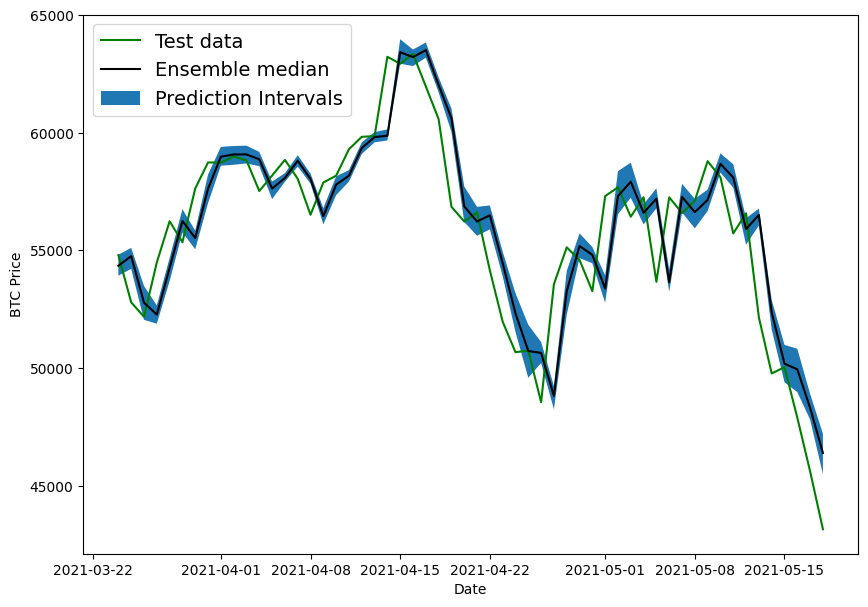

In [174]:
# Get median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of ensemble preds with preds intervals
offset = 500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],
                 label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

## Model 9: Train a model on full data to make preds into the future

In [175]:
HORIZON = 1
WINDOW_SIZE = 7

In [176]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [177]:
# Train model on all data
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [178]:
X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [179]:
# Turn data efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [180]:
# Build a model like ensemble models
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE,), name="input_layer")
x = layers.Dense(128, activation="relu")(inputs)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)

model_9 = tf.keras.Model(inputs, outputs, name="model_9_future_model")

model_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_9.fit(dataset_all, epochs=100,
            callbacks=[create_model_checkpoint(model_9.name)])

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4311.7573
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2894.0674
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1546.0239
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 328.6163
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 849.1334
Epoch 6/100


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 914.8314 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 469.4324
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 334.1014
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 512.7126
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 370.9118
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 251.9364
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 340.5575
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 265.1557
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 260.6435
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 264.7351
Epoch 16/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 224.8317
Epoch 17/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 244.9729
Epoch 18/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 219.7783
Epoch 19/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 224.2219
Epoch 20/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 210.8750
Epoch 21

### Make preds into the future

In [181]:
INTO_FUTURE = 14

In [182]:
# Create a function to predict into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  # Create an empty list for future forecasts
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # Make into_future number of preds
  for _ in range(into_future):
    # Predict on last window and append it so many times (eventually model will be making preds on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append preds
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [183]:
# Make forecast into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55918.15625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55918.15625   ] -> Prediction: 51300.83203125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55918.15625    51300.83203125] -> Prediction: 49934.00390625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55918.15625    51300.83203125 49934.00390625] -> Prediction: 47905.23046875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55918.15625
 51300.83203125 49934.00390625 47905.23046875] -> Prediction: 47717.4921875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

### Plot future forecasts

In [184]:
future_forecast

[55918.156,
 51300.832,
 49934.004,
 47905.23,
 47717.492,
 47806.5,
 47550.53,
 54702.965,
 50229.105,
 49573.895,
 47019.926,
 48930.168,
 49475.348,
 49994.074]

In [185]:
def get_future_dates(start_date, into_future, offset=1):
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" = day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [186]:
# last timestep of timesteps
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [187]:
# Get next 2 weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [188]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55918.156, 51300.832, 49934.004, 47905.23 , 47717.492,
        47806.5  , 47550.53 , 54702.965, 50229.105, 49573.895, 47019.926,
        48930.168, 49475.348, 49994.074], dtype=float32))

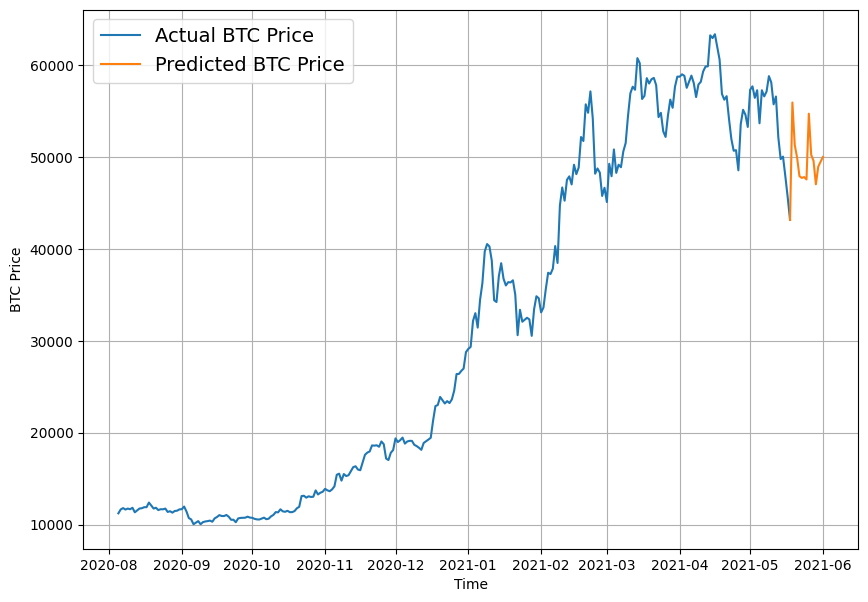

In [189]:
# Plot future prices preds
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: The Turkey Problem

In [190]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [191]:
# Manufacture an extra price on the end (for Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [192]:
# Get timesteps
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

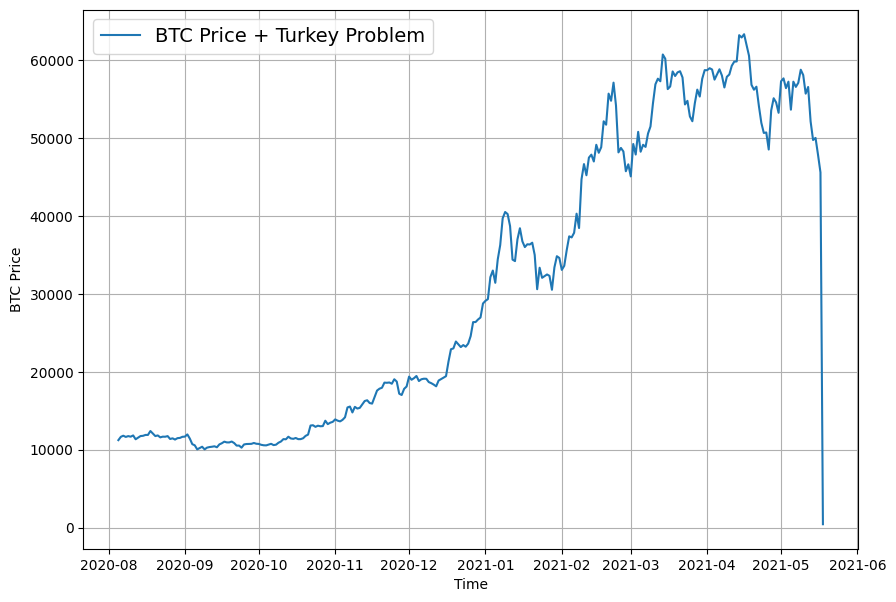

In [193]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [194]:
HORIZON = 1
WINDOW_SIZE = 7

In [195]:
# Create train & test split for turkey problem
full_windows, full_labels = make_windows(np.array(btc_price_turkey),
                                         window_size=WINDOW_SIZE,
                                         horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

### Build turkey model

In [196]:
# Clone model_1
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"

turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())

turkey_model.fit(X_train, y_train,
                 epochs=100,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3265.2461 - val_loss: 2146.9470
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 374.5432 - val_loss: 1638.9445
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 246.3697 - val_loss: 1040.6613
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 170.2213 - val_loss: 1100.5900
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 160.8992 - val_loss: 965.6929
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 151.1333 - val_loss: 929.8272
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 145.4032 - val_loss: 918.1996
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 142.4846 - val_loss: 882.1044
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 139.0246 - val_loss: 875.6251
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 137.2766 - val_loss: 837.0235
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 133.1321 - val_loss: 814.0978
Epoch 12/1

In [197]:
# Evaluate model
turkey_model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 293.9792 


647.4496459960938

In [198]:
# # Load best turkey_model and evaluate it
# turkey_model = tf.keras.models.load_model("model")
turkey_model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 293.9792


647.4496459960938

In [199]:
# Make preds
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8820.578, 8741.046, 9008.254, 8762.895, 8686.502, 8712.424,
       8647.844, 8503.937, 8415.759, 8503.199], dtype=float32)>

In [200]:
# Evaluate preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 647.4496,
 'mse': 4866720.0,
 'rmse': 647.4496,
 'mape': 21.50089,
 'mase': 26.476166}

In [201]:
model_1_results

{'mae': 573.06555,
 'mse': 1178616.6,
 'rmse': 1085.6411,
 'mape': 2.5760217,
 'mase': 1.0067174}

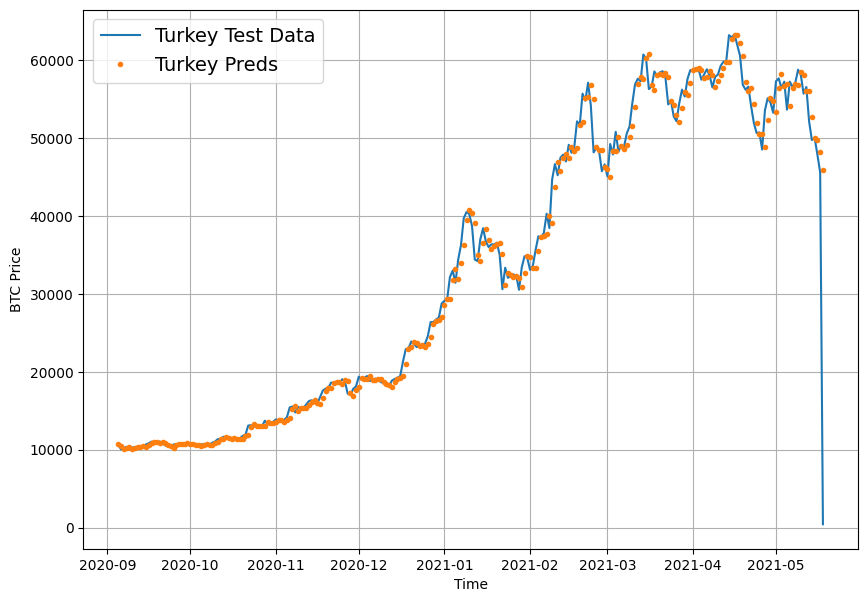

In [202]:
plt.figure(figsize=(10, 7))
offset = 300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data",
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

## Compare models

In [204]:
# w = WINDOW_SIZE, h = HORIZON
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_conv1d": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,573.065552,1.178617e+06,1085.641113,2.576022,1.006717
model_2_dense_w30_h1,619.130127,1.355710e+06,1164.349731,2.777405,1.082245
model_3_dense_w30_h7,627.579895,1.340148e+06,661.732056,2.877968,1.095346
model_4_conv1d,570.781799,1.184828e+06,1088.497925,2.550105,1.002706
model_5_LSTM,585.368469,1.219125e+06,585.368469,2.611770,30.082541
model_6_multivariate,566.944580,1.159292e+06,1076.704102,2.536829,0.995965
model_7_NBEATS,20145.343750,7.144895e+08,26729.935547,100.250534,35.389790
model_8_ensemble,567.662170,1.142251e+06,1068.761475,2.563254,0.997225
model_10_turkey,647.449585,4.866720e+06,647.449585,21.500891,26.476166


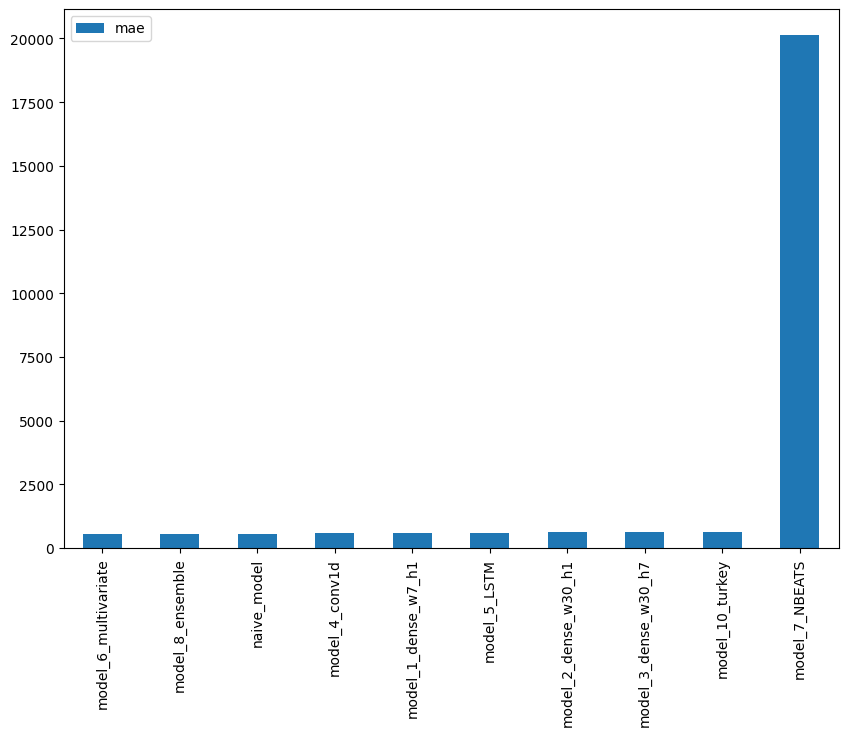

In [206]:
# Sort by MAE
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");